
# Implementation
We will start by creating a synthetic dataset using the given equation.

## 1. Create a synthetic dataset
First, define a function to generate a dataset with 1000 samples in the range of **-4 to -1** from a polynomial with added noise. Assume that the noise is from a normal distribution and has a mean of 0 and std of 5.

The relationship between the independent variable \( X \) and the dependent variable \( y \) is given by the following equation:

\[ y = 0.1X^5 + X^4 - 2X^3 + 7X^2 - 9X + 3 \]

Generate the independent variable \( X \) using the `numpy` library and then calculate the dependent variable \( y \) using the given equation.

In [ ]:
import numpy as np

def generate_dataset(range_start, range_end, num_samples, noise_std=5.0):
    X = np.random.uniform(range_start, range_end, num_samples)
    noise = np.random.normal(0, noise_std, num_samples)
    y = 0.1*X**5 + X**4 - 2*X**3 + 7*X**2 - 9*X + 3 + noise
    return X, y

In [ ]:
X, y = generate_dataset(-4, -1, 1000)

## 2. Splitting the Dataset
Split the dataset into training and two test sets with the same length, ensuring one test set is in the range of the training data and the other is in the **range of 5 to 7.**

In [ ]:
from sklearn.model_selection import train_test_split

degree = 5

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

X_test_r, y_test_r = generate_dataset(5, 7, len(X_test))

## 3. Polynomial Regression Training
Train polynomial regression models of varying degrees from degree = 2 to degree = 7. You can use the `preprocessing`, `linear_model`, and `pipeline` classes of the `sklearn` library.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def train_polynomial_regression(X, y, degree):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X, y)
    return model

In [ ]:
models = {}
start = 2
end = degree + 3
for d in range(start, end):
    models[d] = train_polynomial_regression(X_train.reshape(-1, 1), y_train, d)

## 4. Model Evaluation
Evaluate the models on both test sets using MSE. You can use the `mean_squared_error` from `sklearn.metrics`.


In [ ]:
from sklearn.metrics import mean_squared_error

def evaluate_models(models, X_test, y_test):
    losses = {}
    for degree, model in models.items():
        y_pred = model.predict(X_test.reshape(-1, 1))
        loss = mean_squared_error(y_test, y_pred)
        losses[degree] = loss
    return losses

In [ ]:
losses_train = evaluate_models(models, X_train, y_train)
losses_in_range = evaluate_models(models, X_test, y_test)
losses_out_range = evaluate_models(models, X_test_r, y_test_r)

## 5. Plotting Model Scores

Now to evaluate the performance of the polynomial regression models, plot the **logarithm** of losses of the training and two test sets based on the model degree varying from 3 to 7. Train the model a few times to get a sense of how the results can change.


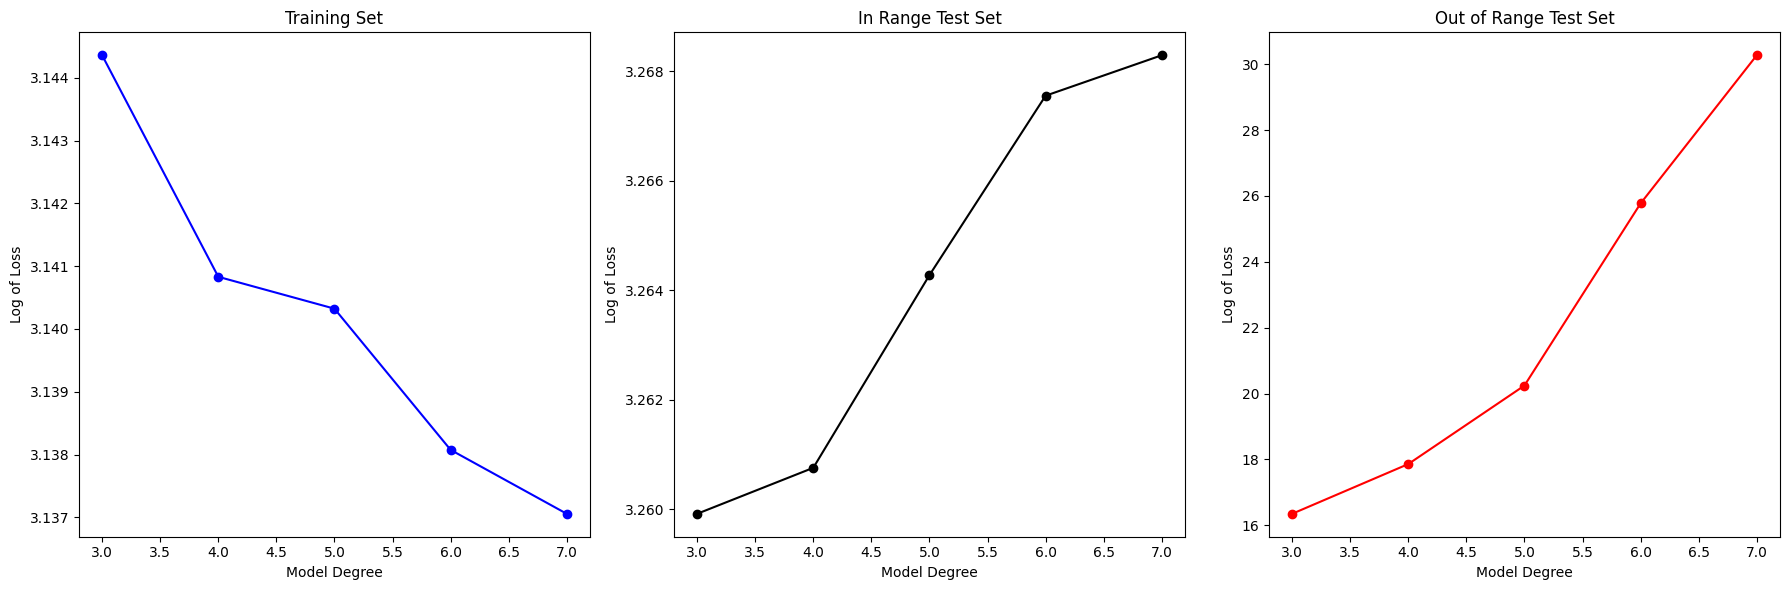

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

fig, (plt1, plt2, plt3) = plt.subplots(1, 3, figsize=(18, 6))

degree = range(3,8)

plt1.plot(degree, np.log([loss for key, loss in losses_train.items()][1:]), marker='o', color='blue')
plt1.set_xlabel('Model Degree')
plt1.set_ylabel('Log of Loss')
plt1.set_title('Training Set')

plt2.plot(degree, np.log([loss for key, loss in losses_in_range.items()][1:]), marker='o', color='black')
plt2.set_xlabel('Model Degree')
plt2.set_ylabel('Log of Loss')
plt2.set_title('In Range Test Set')


plt3.plot(degree,np.log([loss for key, loss in losses_out_range.items()][1:]), marker='o', color='red')
plt3.set_xlabel('Model Degree')
plt3.set_ylabel('Log of Loss')
plt3.set_title('Out of Range Test Set')

plt.tight_layout()
plt.show()


## Conclusion

Now print out the losses on each set here.

In [ ]:
print("Losses on Training set:")
for degree, loss in losses_train.items():
    print(f"Degrees {degree}: {loss}")

# Print the loss values for each model on the in-range test set
print("\nLosses on the In Range Testing set:")
for degree, loss in losses_in_range.items():
    print(f"Degrees {degree}: {loss}")

# Print the loss values for each model on the out-of-range test set
print("\nLosses on the Out of Range Testing set:")
for degree, loss in losses_out_range.items():
    print(f"Degrees {degree}: {loss}")

Losses on Training set:
Degrees 2: 31.063739163273052
Degrees 3: 23.20477535384504
Degrees 4: 23.123058250087972
Degrees 5: 23.111322758544528
Degrees 6: 23.059420770582534
Degrees 7: 23.035957890351725

Losses on the In Range Testing set:
Degrees 2: 31.699930666730598
Degrees 3: 26.04733867632904
Degrees 4: 26.06922981755421
Degrees 5: 26.16114253808318
Degrees 6: 26.24703534971772
Degrees 7: 26.266437562776417

Losses on the Out of Range Testing set:
Degrees 2: 244568.7395794297
Degrees 3: 12570694.22671334
Degrees 4: 56949280.89626313
Degrees 5: 618053761.8668796
Degrees 6: 156153217721.92752
Degrees 7: 14043965052381.82


With comparing the loss of **training set and the in-range test set** and also **in-range test set and the out-of-range test set**, specially in higher degrees, what we can conclude about the bias - variance trade off?

**Answer:**

Expected to explain overfitiing on the training set and also the face that model has less generalization to unseen data.

At higher levels of complexity, a model may overfit the training data—showing low training error but failing to generalize to **in-range** test data. When evaluated on an **out-of-range** test set, its performance decreases, indicating high variance and a limited ability to generalize beyond the training data distribution. Therefore, balancing model complexity is essential to achieve good performance on unseen data and to avoid **overfitting**.
